*ChatGPT-4 used throughout to generate code snippets*

# Setup

## Install libraries

geopandas, fastparquet, numpy

In [1]:
# in jupyter notebooks, normal install using !pip install doesn't work, use the solution from:
# https://www.geeksforgeeks.org/install-python-package-using-jupyter-notebook/

import sys
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install fastparquet
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tempun

In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import fastparquet
import tempun

## Import LIRE_v2.3 dataset 

**Source**: https://zenodo.org/record/8147298

**Format**: parquet

In [3]:
lire = gpd.read_parquet('data/LIRE_v2-3.parquet')

### Display first five rows of LIRE dataset

In [4]:
lire.head(5)

,LIST-ID,EDCS-ID,EDH-ID,trismegistos_uri,pleiades_id,transcription,inscription,clean_text_conservative,clean_text_interpretive_sentence,clean_text_interpretive_word,...,not_before,Longitude,Latitude,geotemporal?,geometry,urban_context,urban_context_city,urban_context_pop_est,type_of_inscription_auto,type_of_inscription_auto_prob
445464,445465,EDCS-03700724,HD052964,https://www.trismegistos.org/text/121715,531064,Fortissimo et piis/simo Caesari d(omino) n(ost...,Fortissimo et Piis/simo Caesari d(omino) n(ost...,Fortissimo et piissimo Caesari d n Gal Val P F...,Fortissimo et piissimo Caesari domino nostro G...,Fortissimo et piissimo Caesari domino nostro G...,...,309.0,20.766800,39.451200,True,POINT (20.767 39.451),rural,None,NaN,honorific inscription,1.0
445466,445467,EDCS-03300852,HD051000,https://www.trismegistos.org/text/177273,240855,[Imp(eratori) Caes(ari) M(arco)] / An[nio] Flo...,Imp(eratori) / Floriano / P(io) F(elici) Aug(u...,An Floriano P F Aug p p m p III Imp Caes M Aur...,Imperatori Caesari Marco Annio Floriano Pio Fe...,Imperatori Caesari Marco Annio Floriano Pio Fe...,...,276.0,22.417100,37.431900,True,POINT (22.417 37.432),large,Tegea,46362.0,mile-/leaguestone,1.0
445467,445468,EDCS-28500283,HD021396,https://www.trismegistos.org/text/177131,,T[i(berius)] Claudius Caesar Aug(ustus) / G[er...,T[(iberius)] Claudius Caesar Aug(ustus) / G[er...,T Claudius Caesar Aug Ganicus pontif max trib ...,Tiberius Claudius Caesar Augustus Germanicus p...,Tiberius Claudius Caesar Augustus Germanicus p...,...,49.0,22.420877,37.454501,True,POINT (22.421 37.455),large,Tegea,46362.0,public legal inscription,1.0
445469,445470,EDCS-09400671,HD011892,https://www.trismegistos.org/text/177087,,Pro salute Imp(eratorum) Caesari(s) / L(uci) S...,Pro salute Imp(eratoris) Caesari(s) / L(uci) S...,Pro salute Imp Caesari L Septimi Severi et M A...,Pro salute Imperatorum Caesaris Luci Septimi S...,Pro salute Imperatorum Caesaris Luci Septimi S...,...,198.0,24.937637,37.837612,True,POINT (24.938 37.838),rural,None,NaN,votive inscription,1.0
445471,445472,EDCS-24600769,HD050999,https://www.trismegistos.org/text/177272,570531,Octa(vius) Sal(utaris),Octa(vius) Sa(lutaris),Octa Sal,Octavius Salutaris,Octavius Salutaris,...,81.0,21.627100,37.647900,True,POINT (21.627 37.648),rural,None,NaN,owner/artist inscription,1.0


### Print column names

Also set column names as a variable so that it can be used later

In [5]:
lire_columns = lire.columns
print("\n".join(lire_columns))

LIST-ID
EDCS-ID
EDH-ID
trismegistos_uri
pleiades_id
transcription
inscription
clean_text_conservative
clean_text_interpretive_sentence
clean_text_interpretive_word
clean_text_interpretive_word_EDCS
diplomatic_text
province
place
inscr_type
status_notation
inscr_process
status
partner_link
last_update
letter_size
type_of_inscription
work_status
year_of_find
present_location
text_edition
support_objecttype
support_material
support_decoration
keywords_term
people
type_of_inscription_clean
type_of_inscription_certainty
height_cm
width_cm
depth_cm
material_clean
type_of_monument_clean
type_of_monument_certainty
province_label_clean
province_label_certainty
country_clean
country_certainty
findspot_ancient_clean
findspot_ancient_certainty
modern_region_clean
modern_region_certainty
findspot_modern_clean
findspot_modern_certainty
findspot_clean
findspot_certainty
language
language_EDCS
raw_dating
not_after
not_before
Longitude
Latitude
geotemporal?
geometry
urban_context
urban_context_city
urb

# Summed Probability Analysis of the LIRE dataset

## SPA of the entire dataset, disregarding locations

Convert the 'start_date' and 'end_date' columns to integers

In [6]:
lire['not_before'] = lire['not_before'].round().astype(int)
lire['not_after'] = lire['not_after'].round().astype(int)

Initialize the summed probability distribution

In [7]:
# since the dataset uses floating point numbers, resolution must be defined

resolution = 0.1

earliest_date = lire['not_before'].min()
latest_date = lire['not_after'].max()

Creat an array of zeros to hold the summed probabilities

In [8]:
num_bins = int((latest_date - earliest_date) / resolution) + 1
summed_prob = np.zeros(num_bins)

Loop through each inscription to update the summed probability distribution


In [9]:
for index, row in lire.iterrows():
    start = row['not_before']
    end = row['not_after']
    
    start_idx = int((start - earliest_date) / resolution)
    end_idx = int((end - earliest_date) / resolution)
   
    # Calculate uniform distribution for this inscription
    uniform_prob = 1.0 / (end_idx - start_idx + 1)
    
    # Add this distribution to the overall summed distribution
    summed_prob[start_idx : end_idx + 1] += uniform_prob

Plot the summed probability distribution

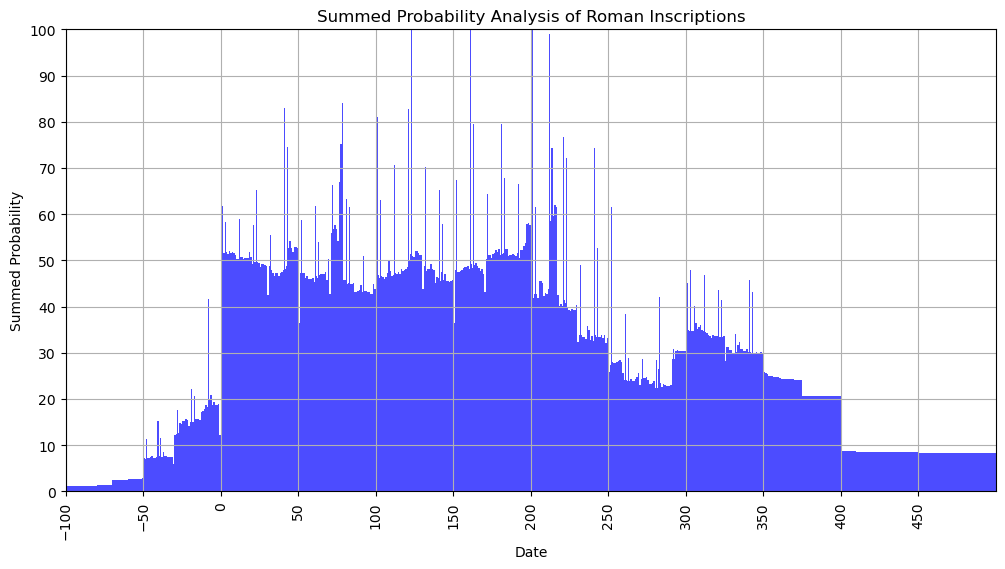

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(np.arange(earliest_date, latest_date + resolution, resolution), summed_prob, width=resolution, color='blue', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Summed Probability')
plt.title('Summed Probability Analysis of Roman Inscriptions')
plt.xlim([-100, 500])
plt.ylim([0, 100])
plt.grid(True)
plt.xticks(np.arange(-100, 500, 50), rotation='vertical')
plt.yticks(np.arange(0, 100 + 10, 10))
plt.show()